In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
df = pd.read_csv('positions.csv')

In [23]:
# Convert data into segments
segments = []
current_segment = []
target = []


for _, row in df.iterrows():

    x, y = row['x'], row['y']
    current_segment.append((x, y))
    if x == 0 and y == 0:
        target.append([row['t_x'], row['t_y']])
        if len(current_segment) > 1:
            segments.append(current_segment[:-1])
            current_segment = [(x, y)]  # Start new segment with the origin point

if current_segment:
    segments.append(current_segment)

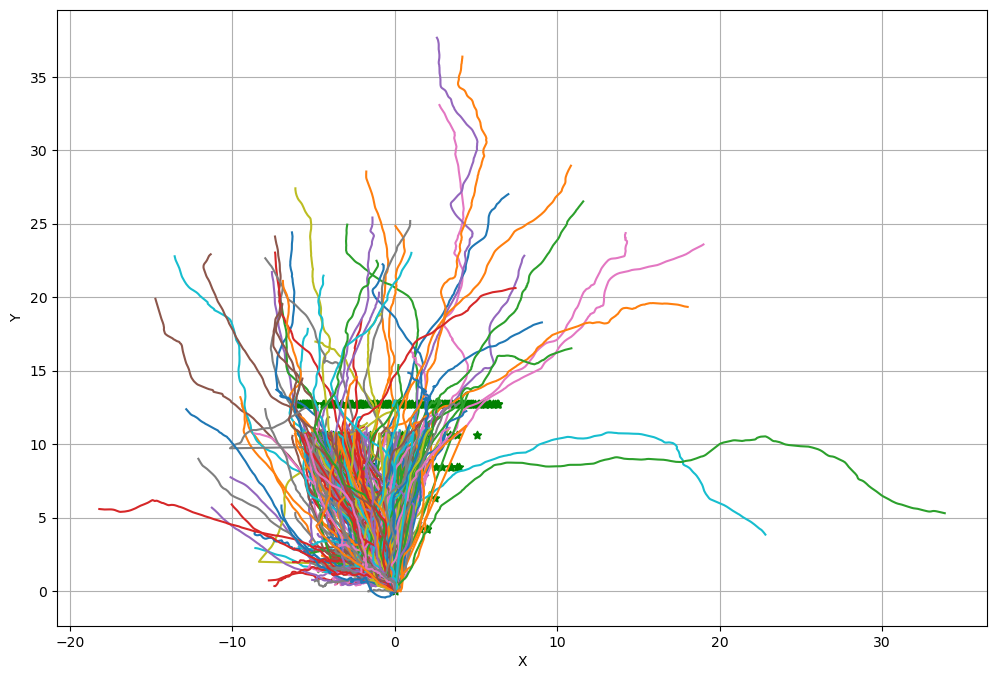

In [24]:
# Plot each segment
plt.figure(figsize=(12, 8))

for segment in segments:
    x_coords, y_coords = zip(*segment)
    plt.plot(x_coords, y_coords, markersize=10)
    
plt.scatter(*zip(*target), marker=(5, 1), c='g')

plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

3.262


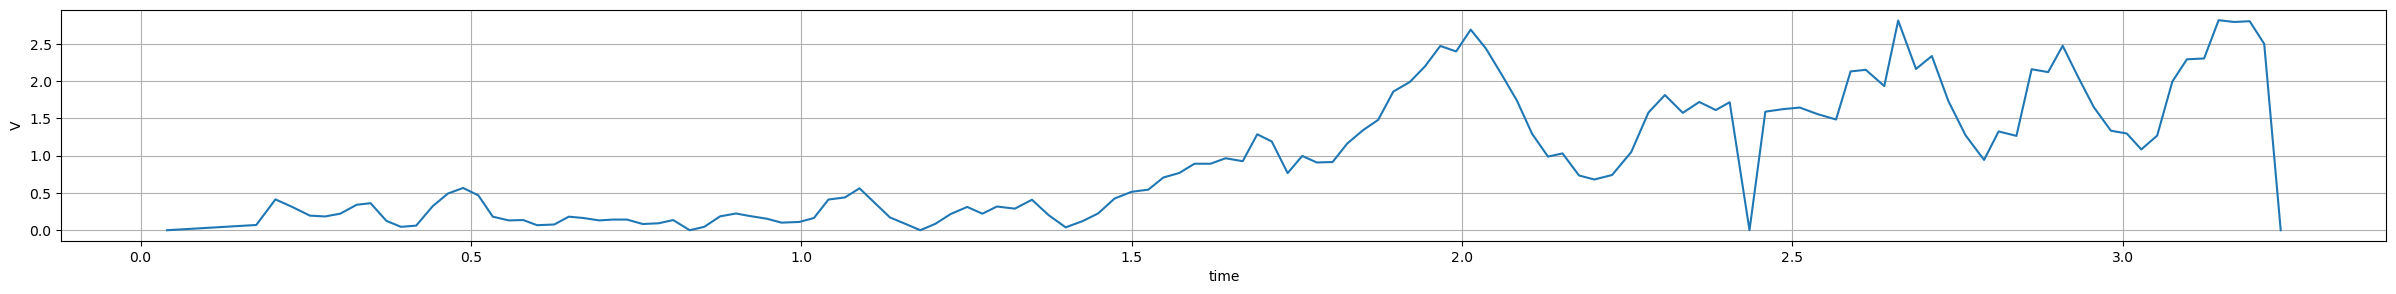

In [25]:
plt.figure(figsize=(30, 3))

plt.plot(df['time'][:130],df['velocity'][:130],linestyle='-')
print(df['time'][130])
plt.xlabel("time")
plt.ylabel("V")
plt.grid(True)
plt.show()

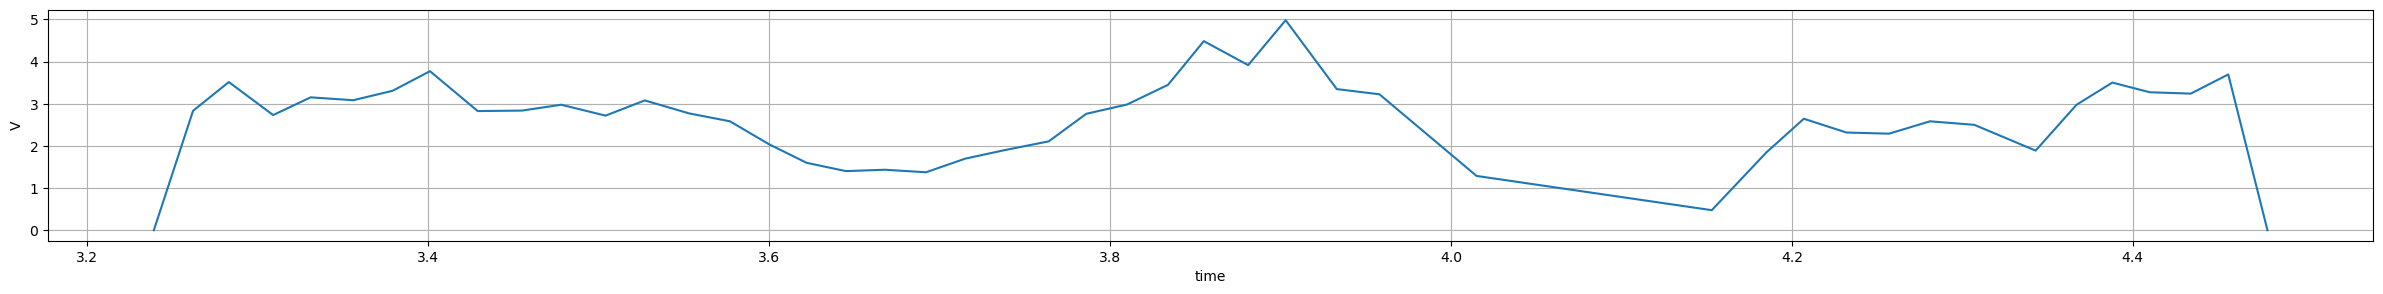

In [26]:
plt.figure(figsize=(30, 3))

plt.plot(df['time'][129:175],df['velocity'][129:175],linestyle='-')
plt.xlabel("time")
plt.ylabel("V")
plt.grid(True)
plt.show()

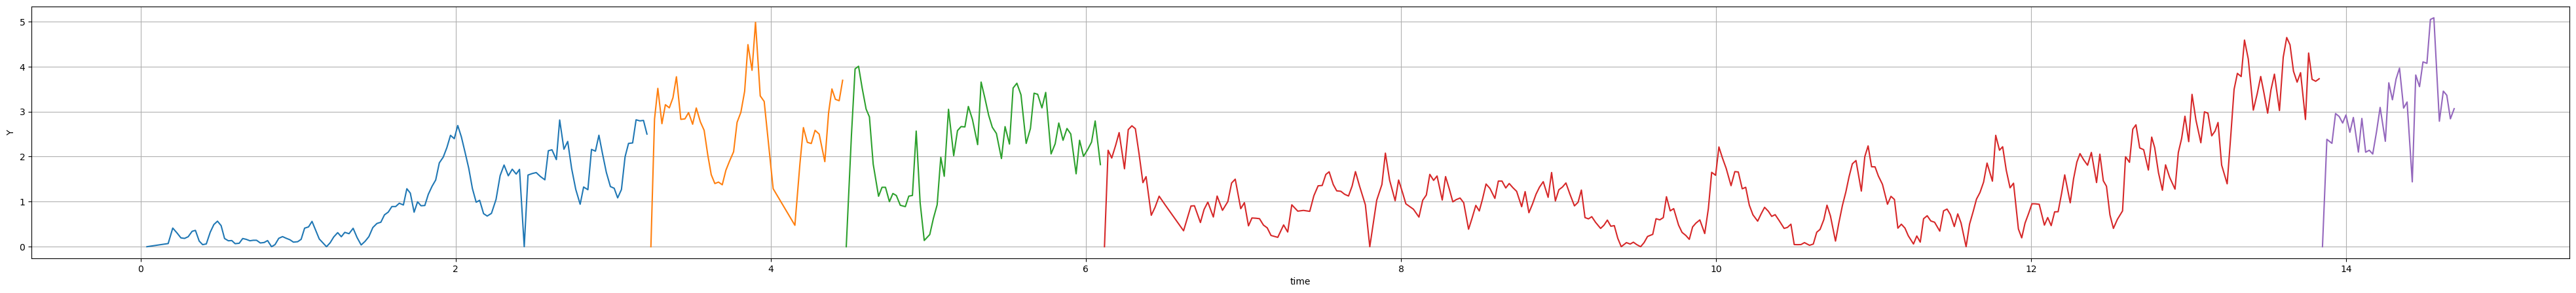

In [27]:
# Convert data into segments
segments = []
current_segment = []
target = []

for _, row in df.iterrows():

    x, y = row['x'], row['y']
    current_segment.append((row['time'], row['velocity'] ))
    if x == 0 and y == 0:
        # target.append([row['velocity'], row['time']])
        if len(current_segment) > 1:
            segments.append(current_segment[:-1])
            current_segment = [(row['time'],row['velocity'])]  # Start new segment with the origin point

if current_segment:
    segments.append(current_segment)

plt.figure(figsize=(50, 5))

for index, segment in enumerate(segments):
    if index >= 5:
        break
    x_coords, y_coords = zip(*segment)
    plt.plot(x_coords, y_coords, markersize=10)
    
# plt.scatter(*zip(*target), marker=(5, 1), c='g')

plt.xlabel("time")
plt.ylabel("Y")
plt.grid(True)
plt.show()

In [28]:
df['acceleration'] = df['velocity'].diff() / df['time'].diff()

# Optional: Remove the first row with NaN acceleration
data = df.dropna()
# data[:131]

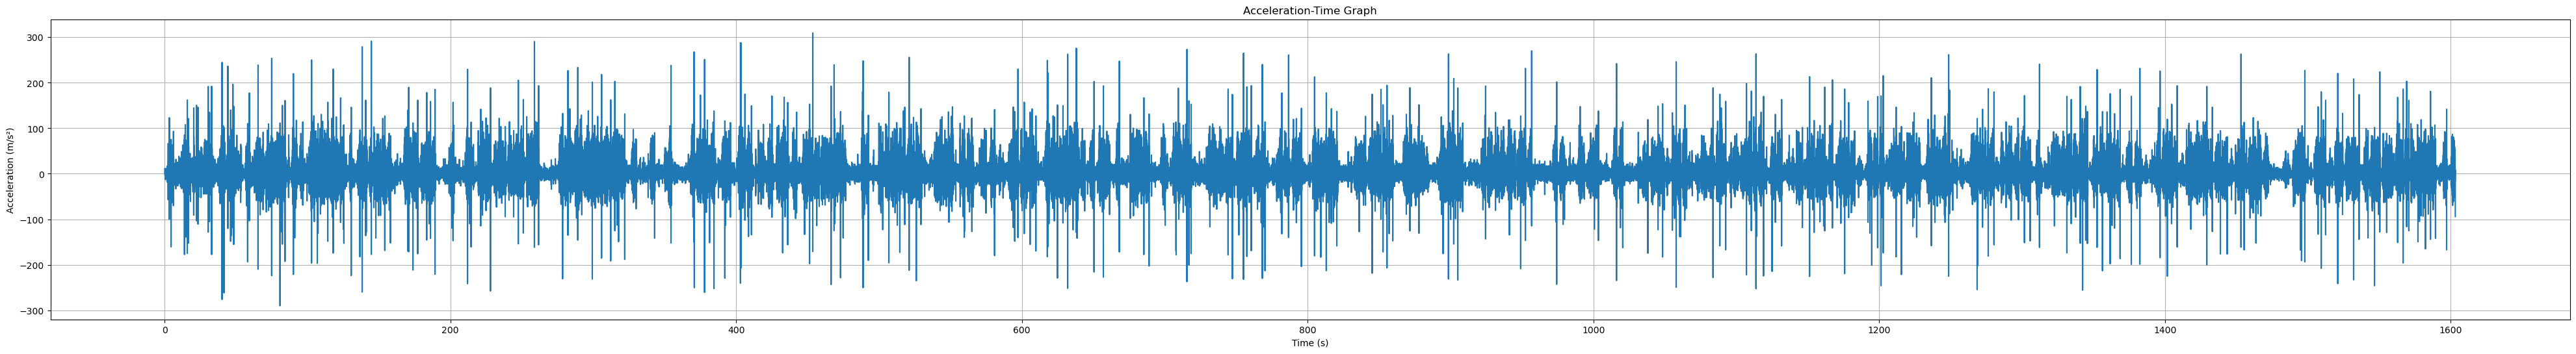

In [29]:
# Step 3: Plot the acceleration-time graph
plt.figure(figsize=(50, 6))
plt.plot(data['time'], data['acceleration'], linestyle='-')
plt.title('Acceleration-Time Graph')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s²)')
plt.grid(True)
plt.show()

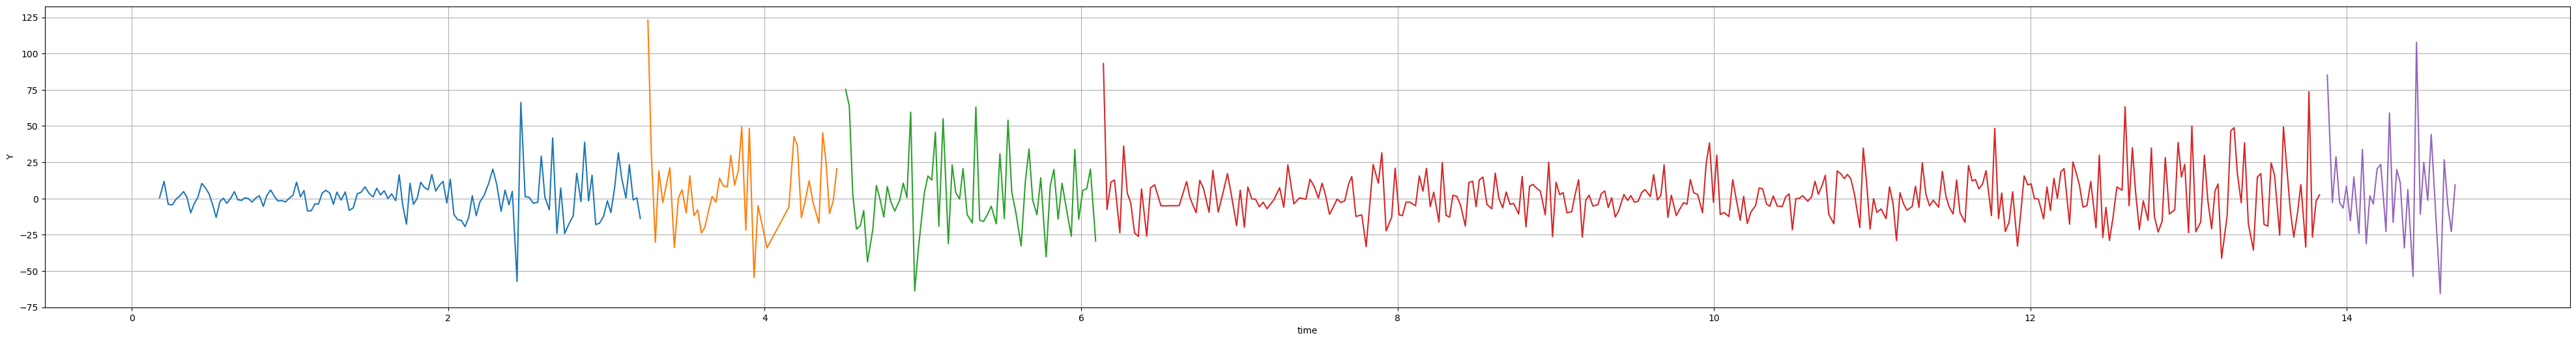

In [30]:
# Convert data into segments
segments = []
current_segment = []

df['acceleration'] = df['velocity'].diff() / df['time'].diff()

# data = df.dropna()

for _, row in df.iterrows():
    x, y = row['x'], row['y']
    
    current_segment.append((row['time'], row['acceleration'] ))
    if x == 0 and y == 0 and len(current_segment) > 1:
            segments.append(current_segment[1:-1])
            current_segment = [(row['time'], row['acceleration'])]  # Start new segment with the origin point

if current_segment:
    segments.append(current_segment)

plt.figure(figsize=(50, 6))

for index, segment in enumerate(segments):
    if index >= 5:
        break
    x_coords, y_coords = zip(*segment)
    # print(segment)
    
    plt.plot(x_coords, y_coords, markersize=10)
    
plt.xlabel("time")
plt.ylabel("Y")
plt.grid(True)
plt.show()